## Challenge 1 - Who Have Published What At Where?
In this challenge you will write a MySQL SELECT query that joins various tables to figure out what titles each author has published at which publishers. Your output should have at least the following columns:

AUTHOR ID - the ID of the author
LAST NAME - author last name
FIRST NAME - author first name
TITLE - name of the published title
PUBLISHER - name of the publisher where the title was published
Your output will look something like below:

Challenge 1 output

Note: the screenshot above is not the complete output.

If your query is correct, the total rows in your output should be the same as the total number of records in Table titleauthor.


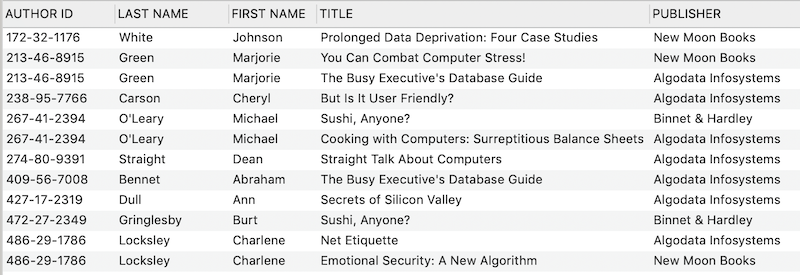

## With reverse engineering obtained ERD diagram :
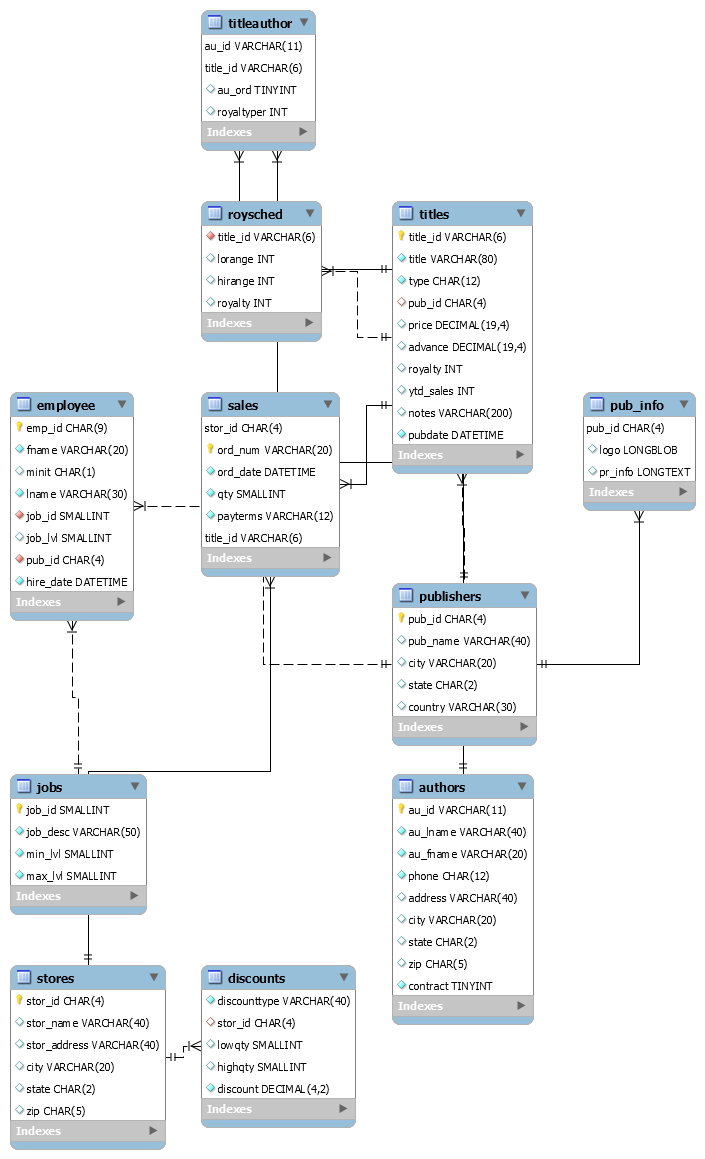

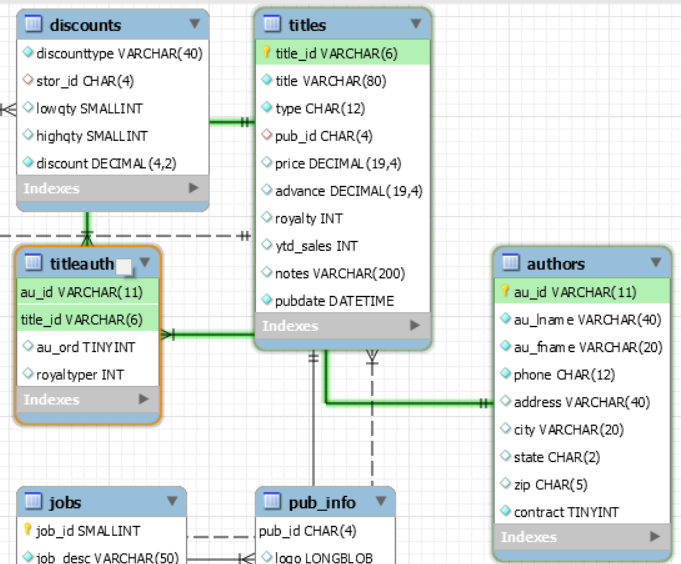

In [ ]:
/*database is designed and what entity tables relate in what ways to other entity tables,the code are queries that join those entities together in a single table  */

SELECT pa.au_id AS 'AUTHOR ID',
	   pa.au_lname AS 'LAST NAME', 
       pa.au_fname AS 'FIRST NAME',
       pt.title AS 'TITLE',
       pp.pub_name AS 'PUBLISHER'
  FROM publications.titles AS pt
  JOIN publications.titleauthor AS pta
  ON pta.title_id = pt.title_id
  JOIN publications.authors AS pa  
  ON pa.au_id = pta.au_id
  JOIN publications.publishers AS pp
  ON pp.pub_id = pt.pub_id;
  
  
  

## OUT: 

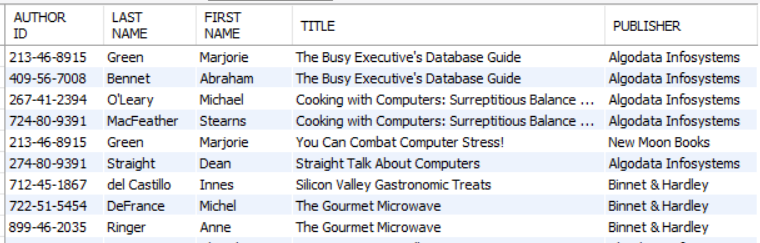


## Challenge 2 - Who Have Published How Many At Where?
Elevating from your solution in Challenge 1, query how many titles each author has published at each publisher. Your output should look something like below:

Challenge 2 output

Note: the screenshot above is not the complete output.

To check if your output is correct, sum up the TITLE COUNT column. The sum number should be the same as the total number of records in Table titleauthor.

Hint: In order to count the number of titles published by an author, you need to use MySQL COUNT. Also check out MySQL Group By because you will count the rows of different groups of data. Refer to the references and learn by yourself. These features will be formally discussed in the Temp Tables and Subqueries lesson.



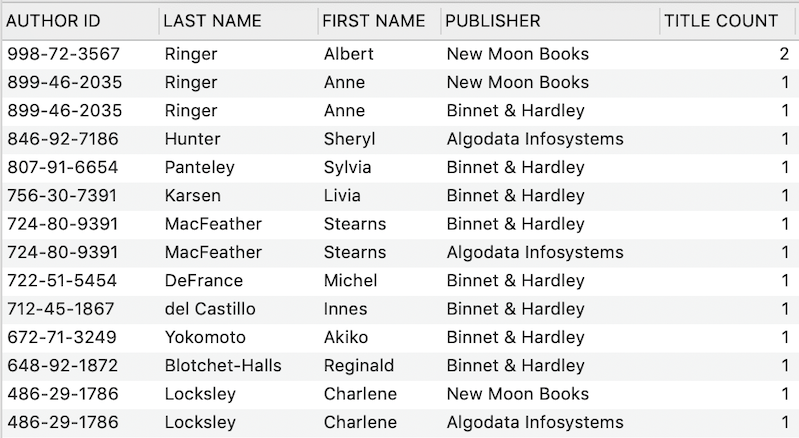

In [ ]:


SELECT au.au_id As "AUTHOR ID", au.au_lname AS "LAST NAME" , au.au_fname AS "FIRST NAME", p.pub_name AS "PUBLISHER", t.title AS "TITLE", count(t.title) AS "TITLE COUNT"
FROM authors AS au
INNER JOIN titleauthor AS ta ON au.au_id = ta.au_id
INNER JOIN titles AS t on t.title_id = ta.title_id
INNER JOIN publishers AS p on p.pub_id = t.pub_id
GROUP BY au.au_id, p.pub_name

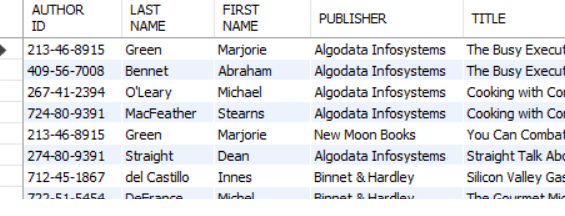

## Challenge 3 - Best Selling Authors
Who are the top 3 authors who have sold the highest number of titles? Write a query to find out.

Requirements:

Your output should have the following columns:
AUTHOR ID - the ID of the author
LAST NAME - author last name
FIRST NAME - author first name
TOTAL - total number of titles sold from this author
Your output should be ordered based on TOTAL from high to low.
Only output the top 3 best selling authors.


In [ ]:
/* Challenge 3 */
SELECT au.au_id AS "AUTHOR ID", au.au_lname AS "LAST NAME" , au.au_fname AS "FIRST NAME", t.title AS "TITLE", sales.qty AS "TOTAL"
FROM authors AS au
INNER JOIN titleauthor AS ta ON au.au_id = ta.au_id
INNER JOIN titles AS t on t.title_id = ta.title_id
INNER JOIN publishers AS p on p.pub_id = t.pub_id
INNER JOIN sales AS sales on sales.title_id = t.title_id
ORDER BY sales.qty DESC
LIMIT 3;



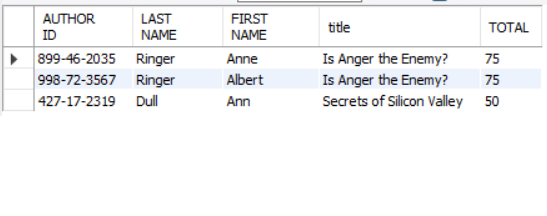

## Challenge 4 - Best Selling Authors Ranking
Now modify your solution in Challenge 3 so that the output will display all 23 authors instead of the top 3. Note that the authors who have sold 0 titles should also appear in your output (ideally display 0 instead of NULL as the TOTAL). Also order your results based on TOTAL from high to low.

Deliverables
solution.sql that contains all your MySQL queries.
Submission
Add solutions.sql to git.
Commit your code.
Push to your fork.
Create a pull request to the class repo.

In [ ]:
/* The left joins makes the row with null value appear*/

/* Challenge 4 */
SELECT au.au_id AS "AUTHOR ID", au.au_lname AS "LAST NAME" , au.au_fname AS "FIRST NAME", t.title AS "TITLE", sales.qty AS "TOTAL"
FROM authors AS au
INNER JOIN titleauthor AS ta ON au.au_id = ta.au_id
INNER JOIN titles AS t on t.title_id = ta.title_id
INNER JOIN publishers AS p on p.pub_id = t.pub_id
LEFT JOIN sales AS sales on sales.title_id = t.title_id
ORDER BY sales.qty DESC
;




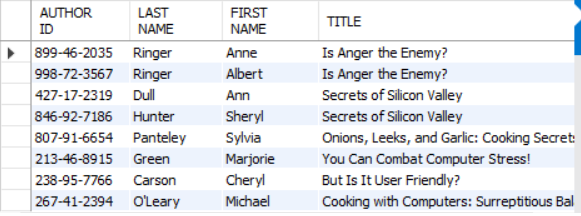

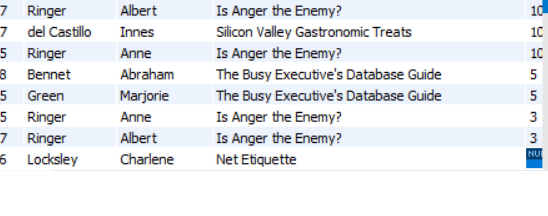